<a href="https://colab.research.google.com/github/USMS-FPK-IA-GI-2025/controle-01-numpy-and-matplotlib-iris-saadchamsi/blob/main/notebooks/controle_numpy_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contrôle 01 — Data Science avec NumPy et Matplotlib
**Master 1 — Intelligence Artificielle & Génie Informatique (FPK / USMS)**

Nom & Prénom :  
Filière :  
Année universitaire :

---

**Règles :**
- Bibliothèques autorisées : NumPy, Matplotlib
- Toute autre bibliothèque est interdite
- Chaque question doit être traitée dans une cellule dédiée
- Chaque résultat doit être brièvement interprété


# Partie A — Importation du Dataset, Arrays, Premières Manipulations

### A1. Importation du dataset
Importez NumPy et Matplotlib.  
Chargez le fichier `iris.csv` avec `np.genfromtxt` (`delimiter=','`, `skip_header=1`).  
Stockez les données dans un array nommé `data` et affichez sa `shape`.


In [12]:
iris_data = np.genfromtxt(
    "Iris.csv",
    delimiter=",",
    skip_header=1,
    dtype=str
)


### A2. Séparation des features et des espèces
Séparez :
- les 4 premières colonnes numériques dans un array `features`
- la dernière colonne (espèces) dans un array `species`
Utilisez le slicing.


In [13]:
X = iris_data[:, :4].astype(float)
y = iris_data[:, 4]


### A3. Indexing
Affichez les 5 premières lignes de `features` en utilisant l’indexing.


In [14]:
X[:5]


array([[1. , 5.1, 3.5, 1.4],
       [2. , 4.9, 3. , 1.4],
       [3. , 4.7, 3.2, 1.3],
       [4. , 4.6, 3.1, 1.5],
       [5. , 5. , 3.6, 1.4]])

### A4. Extraction d’une colonne
Créez un array `sepal_length` contenant uniquement la première colonne de `features`.  
Affichez sa `size` et son `dtype`.


In [15]:
sepal_length = X[:, 0]
sepal_length.size, sepal_length.dtype


(150, dtype('float64'))

### A5. Slicing par espèce
Utilisez le slicing pour extraire les 50 premières lignes correspondant à l’espèce *Setosa*.  
Stockez-les dans `setosa_features`.


In [16]:
setosa_X = X[:50]


# Partie B — Statistiques Basiques et Opérations Mathématiques

### B6. Moyenne par colonne
Calculez la moyenne de chaque colonne de `features` avec `np.mean(axis=0)`.


In [17]:
mean_features = np.mean(X, axis=0)
mean_features


array([75.5       ,  5.84333333,  3.054     ,  3.75866667])

### B7. Min et Max
Trouvez la valeur minimale et maximale de la longueur des pétales.


In [18]:
petal_length = X[:, 2]
petal_length.min(), petal_length.max()


(np.float64(2.0), np.float64(4.4))

### B9. Normalisation
Normalisez les longueurs des pétales en les divisant par leur maximum.
Stockez le résultat dans `normalized_petals`.


In [19]:
normalized_petals = petal_length / petal_length.max()


### B10. Somme cumulée
Calculez la somme cumulée des largeurs des pétales pour Versicolor.
Affichez les 10 premières valeurs.


In [20]:
versicolor_pw = X[50:100, 3]
np.cumsum(versicolor_pw)[:10]


array([ 4.7,  9.2, 14.1, 18.1, 22.7, 27.2, 31.9, 35.2, 39.8, 43.7])

### B10. Somme cumulée
Calculez la somme cumulée des largeurs des pétales pour Versicolor.
Affichez les 10 premières valeurs.


# Partie C — Transformations Avancées avec NumPy

### C11. Espèces uniques
Listez les espèces uniques avec `np.unique` et comptez leurs occurrences.


In [34]:
species_names, species_counts = np.unique(y, return_counts=True)
species_names, species_counts


(array(['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '1.0', '1.1', '1.2',
        '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2.0', '2.1',
        '2.2', '2.3', '2.4', '2.5'], dtype='<U15'),
 array([ 6, 28,  7,  7,  1,  1,  7,  3,  5, 13,  8, 12,  4,  2, 12,  5,  6,
         6,  3,  8,  3,  3]))

### C12. Reshape par espèce
Transformez `features` en un array de forme `(3, 50, 4)` nommé `features_by_species`.


In [21]:
X_by_species = X.reshape(3, 50, 4)
X_by_species.shape


(3, 50, 4)

### C13. Concaténation
Concaténez horizontalement les moyennes par colonne avec un array de zéros.


In [22]:
zeros = np.zeros_like(mean_features)
concatenated = np.concatenate((mean_features, zeros))
concatenated


array([75.5       ,  5.84333333,  3.054     ,  3.75866667,  0.        ,
        0.        ,  0.        ,  0.        ])

### C14. Data cleaning (simulation)
Simulez des valeurs NaN et remplacez-les avec `np.nan_to_num`.


In [23]:
X_nan = X.copy()
X_nan[5, 1] = np.nan

X_clean = np.nan_to_num(X_nan)


### C15. Broadcasting
Ajoutez 1 à toutes les valeurs de la première colonne de `features`.


In [24]:
X[:, 0] += 1


### C16. np.where
Créez un array binaire indiquant si la longueur des pétales est supérieure à 4.0.


In [25]:
petal_long = np.where(X[:, 2] > 4.0, 1, 0)


# Partie D — Visualisation avec Matplotlib (Plots Simples)

### D17. Line plot
Line plot des longueurs des sépales pour les 50 premières fleurs.


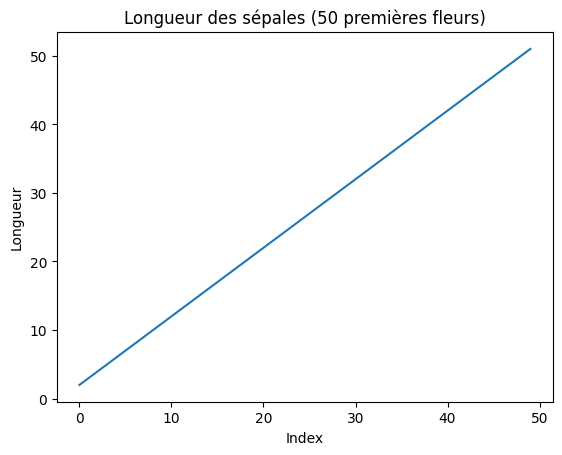

In [27]:
plt.plot(X[:50, 0])
plt.title("Longueur des sépales (50 premières fleurs)")
plt.xlabel("Index")
plt.ylabel("Longueur")
plt.show()


### D18. Scatter plot
Scatter plot : longueur vs largeur des pétales.


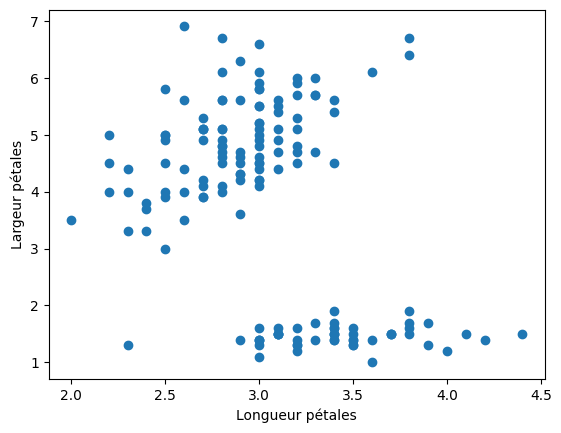

In [28]:
plt.scatter(X[:, 2], X[:, 3])
plt.xlabel("Longueur pétales")
plt.ylabel("Largeur pétales")
plt.show()


### D19. Bar chart
Bar chart des moyennes des quatre caractéristiques.


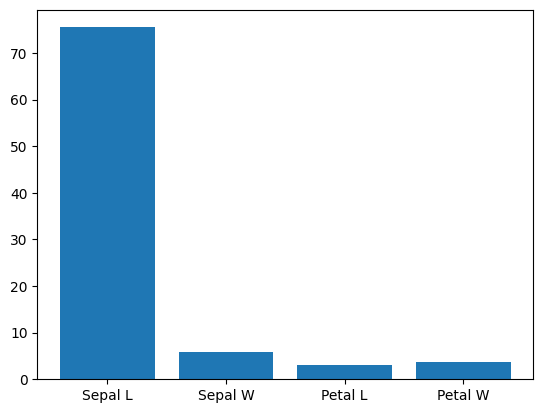

In [32]:
labels = ["Sepal L", "Sepal W", "Petal L", "Petal W"]
plt.bar(labels, mean_features)
plt.show()


### D20. Histogram
Histogramme de la largeur des sépales (10 bins).


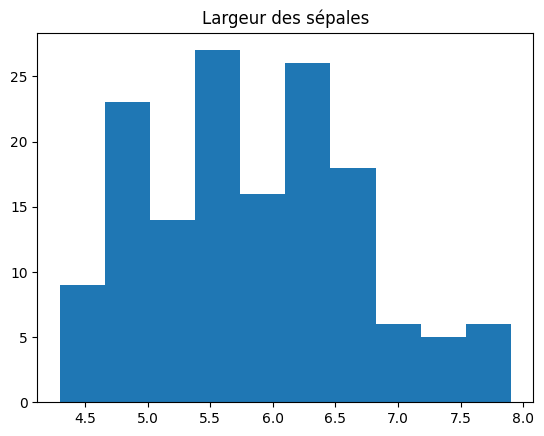

In [31]:
plt.hist(X[:, 1], bins=10)
plt.title("Largeur des sépales")
plt.show()


### D21. Boxplot par espèce
Boxplot des longueurs des pétales par espèce.


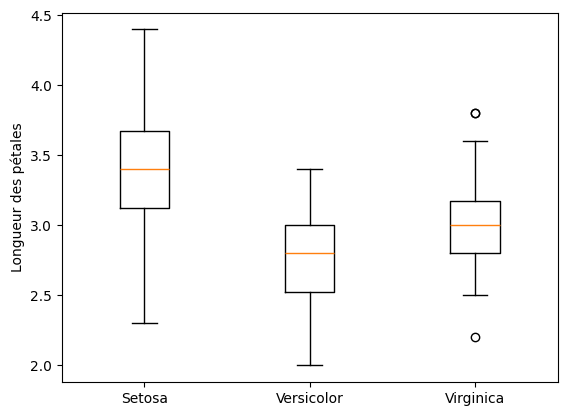

In [38]:
plt.boxplot([
    X_by_species[0, :, 2],
    X_by_species[1, :, 2],
    X_by_species[2, :, 2]
])

plt.xticks([1, 2, 3], ["Setosa", "Versicolor", "Virginica"])
plt.ylabel("Longueur des pétales")
plt.show()


# Partie E — Visualisations Avancées

### E22. Subplots comparatifs
Deux scatter plots côte à côte : Setosa vs Versicolor.


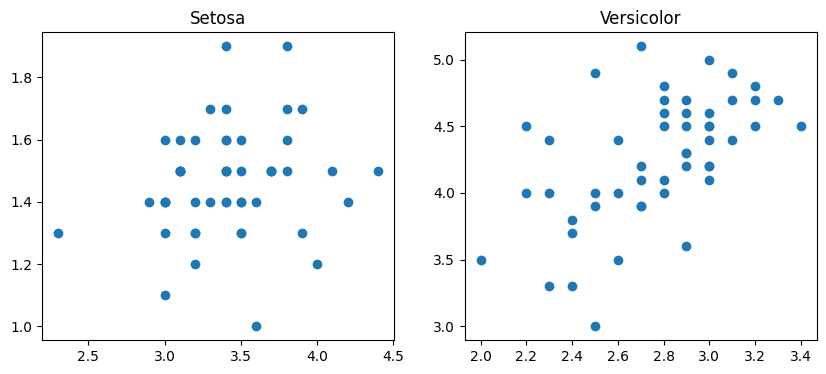

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(X_by_species[0, :, 2], X_by_species[0, :, 3])
axes[0].set_title("Setosa")

axes[1].scatter(X_by_species[1, :, 2], X_by_species[1, :, 3])
axes[1].set_title("Versicolor")

plt.show()


### E23. Grille 2x2
Histogrammes des 4 caractéristiques avec `plt.subplots(2,2)`.


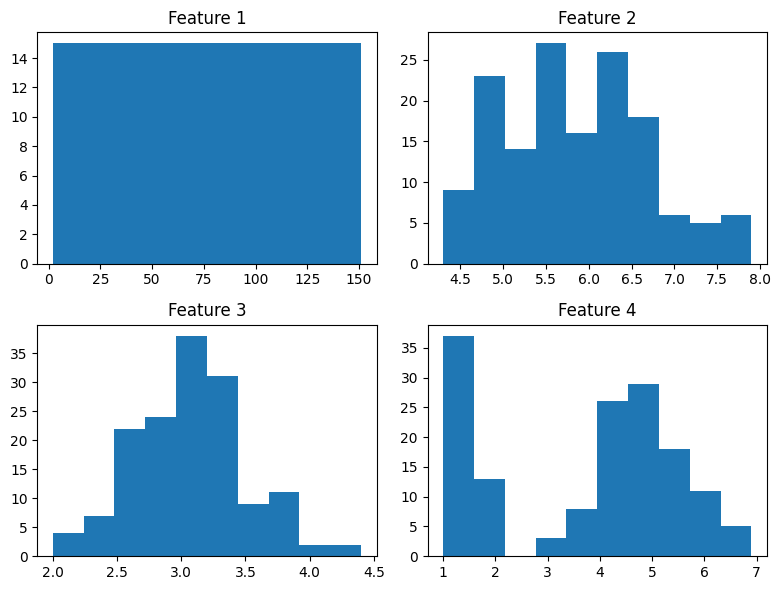

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

for i in range(4):
    axes[i//2, i%2].hist(X[:, i], bins=10)
    axes[i//2, i%2].set_title(f"Feature {i+1}")

plt.tight_layout()
plt.show()


### E24. Bar chart avec error bars
Moyennes par espèce avec écart-type.


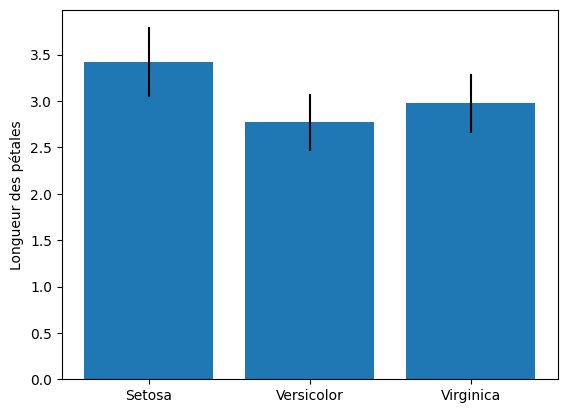

In [45]:
labels = ["Setosa", "Versicolor", "Virginica"]

plt.bar(labels, means, yerr=stds)
plt.ylabel("Longueur des pétales")
plt.show()


### E25. Scatter coloré par espèce
Scatter plot avec couleurs par espèce.


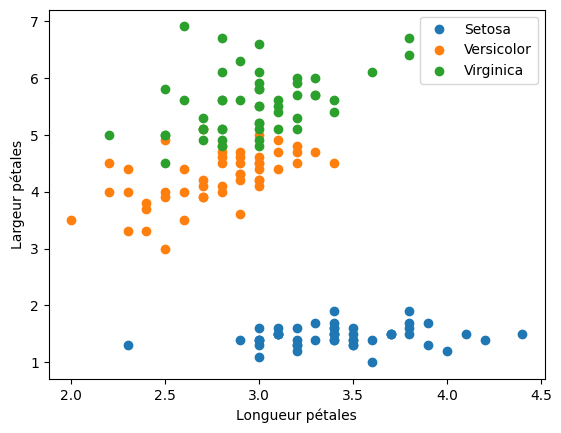

In [47]:
labels = ["Setosa", "Versicolor", "Virginica"]

for i in range(3):
    plt.scatter(
        X_by_species[i, :, 2],
        X_by_species[i, :, 3],
        label=labels[i]
    )

plt.xlabel("Longueur pétales")
plt.ylabel("Largeur pétales")
plt.legend()
plt.show()


### E26. Line plot superposé
Cumsum des largeurs des pétales par espèce.


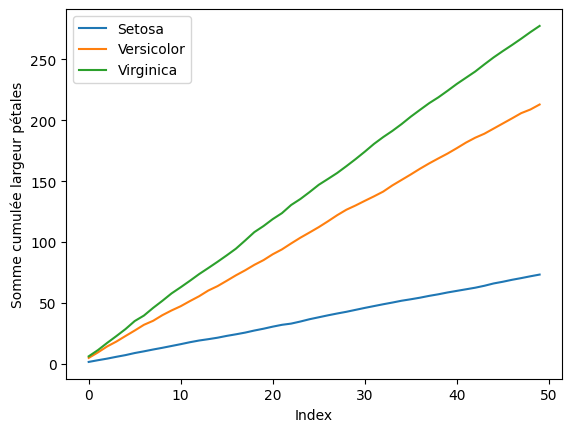

In [49]:
labels = ["Setosa", "Versicolor", "Virginica"]

for i in range(3):
    plt.plot(
        np.cumsum(X_by_species[i, :, 3]),
        label=labels[i]
    )

plt.xlabel("Index")
plt.ylabel("Somme cumulée largeur pétales")
plt.legend()
plt.show()


# Partie F — Mini-Analyse Finale

### F27. Corrélations
Calculez la matrice de corrélation avec `np.corrcoef`.


In [ ]:
# Votre code ici


### F28. Visualisation des corrélations
Visualisez les corrélations sous forme de bar chart ou scatter.


In [ ]:
# Votre code ici


### F29. Variance par espèce
Identifiez l’espèce avec la plus grande variance globale et visualisez ses distributions.


In [ ]:
# Votre code ici


### F30. Conclusion
Rédigez une conclusion contenant **3 insights** issus de votre analyse.


1) ...
2) ...
3) ...